In [ ]:
#import packages we need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [166]:
set_A=pd.read_csv('api_data.csv', encoding='utf-8')
set_B=pd.read_csv('Sales.csv',encoding='utf-8')

C:\Users\maria\AppData\Local\Temp\ipykernel_5312\4185308358.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  set_A=pd.read_csv('api_data.csv', encoding='utf-8')


In [167]:
set_A.shape

(20820, 48)

In [168]:
#remove duplicates in File A, None in File B
set_A= set_A.drop_duplicates()

In [169]:
full_set=set_A.merge(set_B, left_on= 'productId', right_on= 'Artikel ID', how='right')

In [170]:
full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46008 entries, 0 to 46007
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   alcoholPercentage         8256 non-null   float64
 1   assortmentText            8256 non-null   object 
 2   bottleText                8242 non-null   object 
 3   categoryLevel1            8256 non-null   object 
 4   categoryLevel2            8256 non-null   object 
 5   categoryLevel3            4896 non-null   object 
 6   country                   8256 non-null   object 
 7   customCategoryTitle       8256 non-null   object 
 8   ethicalLabel              39 non-null     object 
 9   grapes                    8256 non-null   object 
 10  isClimateSmartPackaging   8256 non-null   object 
 11  isCompletelyOutOfStock    8256 non-null   object 
 12  isDiscontinued            8256 non-null   object 
 13  isEthical                 8256 non-null   object 
 14  isKosh

In [171]:
# Drop redundant columns post merge

full_set = full_set.drop(columns=['productId',
        'productNumber',
       'productNumberShort', 'originLevel1', 'originLevel2', 'price'], axis= 1)

# Translation


In [172]:
#Define a few dictionaries
translation_dict_1= {'Sverige': 'Sweden', 'Internationellt märke': 'International trademark', 'Storbritannien': 'United Kingdom', 'Finland': 'Finland', 'Norge': 'Norway', 'Frankrike': 'France',
                'Irland': 'Ireland', 'USA': 'USA', 'Kanada': 'Canada', 'Nederländerna': 'The Netherlands', 'Belgien': 'Belgium', 'Italien': 'Italy', 'Tyskland': 'Germany', 'Trinidad': 'Trinidad',
                'Förpackning': 'Packaging', 'Tjeckien': 'Czech Republic', 'Spanien': 'Spain', 'Mexiko': 'Mexico', 'Australien': 'Australia', 'Chile': 'Chile', 'Cypern': 'Cyprus',
                'Portugal': 'Portugal', 'Rumänien': 'Romania', 'Ungern': 'Hungary', 'Nya Zeeland': 'New Zealand', 'Sydafrika': 'South Africa', 'Libanon': 'Lebanon', 'Grekland': 'Greece', 
                ' ursprung': ' origin', 'Argentina': 'Argentina', 'Österrike': 'Austria, Austria', 'Jamaica': 'Jamaica', 'Golanhöjderna (israelisk bosättning)': 'Golan Heights (Israeli settlement)',
                'Brasilien': 'Brazil', 'Polen': 'Poland', 'Barbados': 'Barbados', 'Bulgarien': 'Bulgarian', 'Kuba': 'Cuba', 'Japan': 'Japan', 'Kroatien': 'Kroatien', 'Namibia': 'Namibia', 
                'Turkiet': 'Turkite', 'Danmark': 'Denmark', 'Dominikanska Republiken': 'Dominican Republic', 'Thailand': 'Thailand', 'Kenya': 'Kenya', 'Bosnien-Hercegovina': 'Bosnia and Herzegovina',
                'Peru': 'Peru', 'Slovenien': 'Slovenien', 'Indien': 'Indien', 'Guyana': 'Guyana', 'Island': 'Island', 'Venezuela': 'Venezuela', 'Serbien': 'Serbia', 'Guatemala': 'Guatemala',
                'Sri Lanka': 'Sri Lanka', 'Israel': 'Israel', 'EU': 'EU', 'Nordmakedonien': 'North Macedonia', 'Panama': 'Panama', 'Varierande ursprung': 'Varying origins', 
                'Filippinerna': 'Philippines', 'Colombia': 'Colombia', 'Litauen': 'Lithuania', 'Folkrepubliken Kina': "People's Republic of China", 'Indonesien': 'Indonesien', 'Moldavien': 'Moldavien', 
                'Paraguay': 'Paraguay', 'Belize': 'Belize', 'Mauritius': 'Mauritius', 'Uruguay': 'Uruguay', 'Antigua & Barbuda': 'Antigua & Barbuda', 'Fiji': 'Fiji', 'Övriga ursprung': 'Other origins',
                'Armenien': 'Armenien', 'Georgien': 'Georgia', 'Sydkorea': 'South Korea', 'Vietnam': 'Vietnam', 'St Lucia': 'Saint Lucia', 'Nigeria': 'Nigeria', 'Grenada': 'Grenada', 
                'Guernsey': 'Guernsey', 'Estland': 'Estonia', 'Eritrea': 'Eritrea', 'El Salvador': 'El Salvador', 'Costa Rica': 'Costa Rica', 'Marocko': 'Marocko', 'Montenegro': 'Montenegro',
                'Bolivia': 'Bolivia', 'Nicaragua': 'Nicaragua', 'Schweiz': 'Switzerland', 'Slovakien': 'Slovakia', 'Lettland': 'Latvia', 'Serbien och Montenegro': 'Serbia and Montenegro', 
                'Etiopien': 'Ethiopien', 'Saint Kitts & Nevis': 'Saint Kitts & Nevis', 'Kosovo': 'Kosovo', 'Luxemburg': 'Luxembourg', 'Västindien Karibien': 'Caribbean Caribbean', 'Haiti': 'Haiti',
                'Ukraina': 'Ukraine', 'Sverige': 'Sweden', 'Internationellt märke': 'International trademark', 'Storbritannien': 'United Kingdom', 'Finland': 'Finland', 'Norge': 'Norway', 
                'Skåne län': 'Skåne county', 'Normandie': 'Normandie', 'Cognac': 'Cognac', 'Frankrike': 'France', 'Skottland': 'Scotland', 'Irland': 'Ireland', 'Kentucky': 'Kentucky', 'Kanada': 'Canada',
                'Södermanlands län': 'Södermanland County', 'Nederländerna': 'The Netherlands', 'Belgien': 'Belgium', 'Italien': 'Italian', 'Tyskland': 'Germany', 'Trinidad': 'Trinidad', 
                'Förpackning': 'Packaging', 'Dalarnas län': 'Dalarna County', 'Stockholms län': 'Stockholm County', 'Hallands län': 'Halland County', 'England': 'England', 'Tjeckien': 'Czech Republic',
                'Spanien': 'Spain', 'Mexiko': 'Mexico', 'South Eastern Australia': 'South Eastern Australia', 'Valle Central': 'Central Valley', 'Apulien': 'Apulia', 'Cypern': 'Cyprus', 
                'Alsace': 'Alsace', 'Loiredalen': 'Loire Valley', 'Toscana': 'Tuscany', 'Piemonte': 'Piedmont', 'Latium': 'Latium', 'Venetien': 'Venetien', 'Australien': 'Australia',
                'Katalonien': 'Katalonien', 'Rioja': 'Rioja', 'Kalifornien': 'California', 'Portugal': 'Portugal', 'Península de Setúbal': 'Setúbal Peninsula', 'Vinho Verde': 'Vinho Verde',
                'Rumänien': 'Romania', 'Kastilien-La Mancha': 'Kastilien-La Mancha', 'Balaton': 'Lake Balaton', 'Bordeaux': 'Bordeaux', 'Pfalz': 'Palatinate', 'Bourgogne': 'Burgundy',
                'Languedoc-Roussillon': 'Languedoc-Roussillon', 'Kastilien-León': 'Kastilien-León', 'Rhonedalen': 'Rhonedalen', 'Marlborough': 'Marlborough', 'Mosel': 'Mosel', 'Cava': 'Cava',
                'Champagne': 'Champagne', 'Madeira': 'Madeira', 'Douro': 'Douro', 'Andalusien': 'Andalusien', 'Sicilien': 'Sicilian', 'Western Cape': 'Western Cape', 'Abruzzerna': 'Abruzzerna',
                'Bekaa': 'Bekaa', 'Retsina': 'Retsina', 'Umbrien': 'Umbrien', 'Sydafrika': 'South Africa', 'Victoria': 'Victoria', 'Trentino-Alto Adige': 'Trentino-Alto Adige', 
                'Rheinhessen': 'Rheinhessen', 'Kalmar län': 'Kalmar County', 'South Australia': 'South Australia', 'Marche': 'Marche', 'Nahe': 'Near', ' ursprung': ' origin', 'Alentejo': 'Alentejo',
                'Armagnac': 'Armagnac', 'Emilia-Romagna': 'Emilia-Romagna', 'Cuyo': 'Cuyo', 'Dão': 'Dão', 'Grekland': 'Greece', 'Burgenland': 'Burgenland', 'Jamaica': 'Jamaica', 'Ungern': 'Hungary',
                'Rhein': 'Rhine', 'Puerto Rico': 'Puerto Rico', 'Lombardiet': 'Lombardiet', 'Tre Venezie': 'Three Venices', 'Golanhöjderna (israelisk bosättning)': 'Golan Heights (Israeli settlement)',
                'Österrike': 'Austria, Austria', 'Rheingau': 'Rheingau', 'Frankrike sydväst': 'France South-West', 'Brasilien': 'Brazil', 'Jalisco': 'Jalisco', 'Tokaj': 'Tokaj', 'Tennessee': 'Tennessee',
                'Aragonien': 'Aragonien', 'Valencia': 'Valencia', 'Terras do Sado': 'Lands of the Sado', 'USA': 'USA', 'Gotlands län': 'County of Gotland', 'Molise': 'Molise',
                'Örebro län': 'Örebro County', 'Polen': 'Poland', 'Washington State': 'Washington State', 'Barbados': 'Barbados', 'Trakiska låglandet': 'Thracian lowlands', 'Korsika': 'Corsica',
                'Kuba': 'Cuba', 'Makedonien': 'Macedonia', 'Niederösterreich': 'Lower Austria', 'Peloponnesos': 'Peloponnese', 'Japan': 'Japan', 'Coquimbo': 'Coquimbo', 'Kroatien': 'Kroatien',
                'Namibia': 'Namibia', 'Libanon': 'Lebanon', 'Murcia': 'Murcia', 'Turkiet': 'Turkite', 'Rapel': 'Rapel', 'Lisboa': 'Lisbon', 'Danmark': 'Denmark', 'Provence': 'Provence',
                'Aconcagua': 'Aconcagua', 'Galicien': 'Galicien', 'Dominikanska Republiken': 'Dominican Republic', 'Thailand': 'Thailand', 'Kampanien': 'Campanian', 
                'Västra Götalands län': 'Västra Götaland County', 'Västmanlands län': 'Västmanland County', 'Gävleborgs län': 'County of Gävleborg', 'Jämtlands län': 'Jämtland County', 
                'Kanarieöarna': 'Canary Islands', 'Argentina': 'Argentina', 'Kenya': 'Kenya', 'Bosnien-Hercegovina': 'Bosnia and Herzegovina', 'Peru': 'Peru', 'Slovenien': 'Slovenien', 
                'Indien': 'India', 'Guyana': 'Guyana', 'Island': 'Island', 'Venezuela': 'Venezuela', 'Martinique': 'Martinique', 'Tejo': 'Tagus', 'Serbien': 'Serbia', 'Franken': 'Franks',
                'North': 'North', 'Central Otago': 'Central Otago', 'Nya Zeeland': 'New Zealand', 'Guatemala': 'Guatemala', 'Chile': 'Chile', 'Uppsala län': 'Uppsala County', 'Wairarapa': 'Wairarapa',
                'Sri Lanka': 'Sri Lanka', 'Maule': 'Maule', 'Région del Sur': 'Sur region', 'Västerbottens län': 'Västerbotten County', 'Israel': 'Israel', 'Jönköpings län': 'Jönköping County', 
                'EU': 'EU', "Hawke's Bay": "Hawke's Bay", 'Jura': 'Jura', 'Västernorrlands län': 'Västernorrland County', 'Baskien': 'Baskien', 'Blekinge län': 'Blekinge County', 
                'Povardarje': 'Povardarje', 'Nordmakedonien': 'North Macedonia', 'Canterbury': 'Canterbury', 'Extremadura': 'Extremadura', 'Östergötlands län': 'Östergötland County', 
                'Sardinien': 'Sardinien', 'Oregon': 'Oregon', 'Panama': 'Panama', 'Méditerranée': 'Mediterranean', 'Varierande ursprung': 'Varying origins', 'Filippinerna': 'Philippines',
                'Baja California': 'Baja California', 'Jerez': 'Jerez', 'Colombia': 'Colombia', 'Friuli-Venezia-Giulia': 'Friuli-Venezia-Giulia', 'Franska Antillerna': 'French Antilles',
                'Pannon': 'Pannon', 'Litauen': 'Lithuania', 'Basilicata': 'Basilicata', 'Balearerna': 'Balearic Islands', 'Primorska': 'Primorska', 'Värmlands län': 'Värmland County', 
                'Folkrepubliken Kina': "People's Republic of China", 'Duna\x96Tisza közi': 'DunaTisza közi', 'Indonesien': 'Indonesien', 'Norrbottens län': 'Norrbotten County', 'Bretagne': 'Brittany', 
                'Wien': 'Vienna', 'Moldavien': 'Moldavien', 'Paraguay': 'Paraguay', 'Belize': 'Belize', 'Mauritius': 'Mauritius', 'Canelones': 'Cannelloni', 'Savoie': 'Savoie', 
                'Stefan Voda': 'Stefan Voda', 'New South Wales': 'New South Wales', 'Antigua & Barbuda': 'Antigua & Barbuda', 'Fiji': 'Fiji', 'Epirus': 'Epirus', 'Kreta': 'Crete', 
                'Western Australia': 'Western Australia', 'Taiwan': 'Taiwan', 'Armenien': 'Armenien', 'Kontinentalna': 'Continentalna', 'Weinland Österreich': 'Wine country Austria', 
                'Kakheti Region': 'Kakheti Region', 'Åland': 'Åland Islands', 'Bairrada': 'Bairrada', 'Patagonien': 'Patagonien', 'Madrid': 'Madrid', 'Aegean Islands': 'Aegean Islands', 
                'Sydkorea': 'South Korea', 'Ligurien': 'Ligurien', 'Övriga ursprung': 'Other origins', 'Central Greece': 'Central Greece', 'Navarra': 'Navarra', 'Vietnam': 'Vietnam', 
                'Guadeloupe': 'Guadeloupe', 'Bulgarien': 'Bulgarian', 'Uruguay': 'Uruguay', 'Kronobergs län': 'Kronoberg County', 'Racha Region': 'Racha Region', 
                'North Transdanubia': 'North Transdanubia', 'Oltenia': 'Oltenia', 'Attica': 'Attica', 'Oaxaca': 'Oaxaca', 'Primorski': 'Primorski', 'Nelson': 'Nelson', 'St Lucia': 'Saint Lucia', 
                'Virgin Islands': 'Virgin Islands', 'Baden': 'Bathing', 'Nigeria': 'Nigeria', 'Ungstein': 'Ungstein', 'Muntenie et Oltenie': 'Muntenie et Oltenie', "Valle d'Aosta": 'Aosta Valley', 
                'Podravina': 'Podravina', 'Grenada': 'Grenada', 'Galileen': 'Galilee', 'Thessalien': 'Thessaly', 'Guernsey': 'Guernsey', 'Estland': 'Estonia', 'Azorerna': 'Azores', 
                'Steiermark': 'Styria', 'Valle de Ica': 'Valle de Ica', 'Goa': 'Goa', 'Eritrea': 'Eritrea', 'El Salvador': 'El Salvador', 'Salta': 'Salta', 'Costa Rica': 'Costa Rica', 
                'New York State': 'New York State', 'Marocko': 'Marocko', 'Ahr': 'Ahr', 'Eger': 'Eger', 'Montenegro': 'Montenegro', 'Georgien': 'Georgia', 'Bolivia': 'Bolivia', 'Nicaragua': 'Nicaragua', 
                'Tasmanien': 'Tasmanien', 'Maldonado': 'Maldonado', 'Three Lakes': 'Three Lakes', 'Slovakien': 'Slovakia', 'Schweiz': 'Switzerland', 'Vaud': 'Vaud', 'Codru': 'Codru', 'Lettland': 
                'Latvia', 'Ionian Islands': 'Ionian Islands', 'Estremadura': 'Estremadura', 'Serbien och Montenegro': 'Serbia and Montenegro', 'Vin Mousseux de France': 'Sparkling wine from France', 
                'Nordirland': 'Northern Ireland', 'Ontario': 'Ontario', 'Etiopien': 'Ethiopien', 'Mostar': 'Mostar', 'Algarve': 'Algarve', 'Saint Kitts & Nevis': 'Saint Kitts & Nevis', 
                'Valul lui Traian': 'Valul lui Traian', 'Réunion': 'Meeting', 'Kosovo': 'Kosovo', 'Vayots Dzor': 'Vayots Dzor', 'Danube Plain': 'Danube Plain', 'Beira Interior': 'Beira Interior', 
                'Luxemburg': 'Luxembourg', 'Västindien Karibien': 'Caribbean Caribbean', 'Pennsylvania': 'Pennsylvania', 'Morava': 'Moravia', 'Maipo': 'Maipo', 'Haiti': 'Haiti', 'Ukraina': 'Ukraine', 
                'Felsö-magyarországi': 'Upper Hungary', 'Neuchâtel': 'Neuchâtel', 'Hautes-Alpes': 'Hautes-Alpes', 'Valais': 'Valais', 'Wales': 'Wales', 'Yamanashi': 'Yamanashi', 'Auckland': 'Auckland', 
                'Kalabrien': 'Kalabrien', 'Württemberg': 'Württemberg','Kvittonamn' : 'Receipt_name', 'Namn': 'Name', 'Producentnamn':'Producer_Name', 'Varugrupp':'Product_Group',
                'Varugrupp detalj': 'Product_Group_Details', 'Rubrik':'Headline', 'Aktuellt pris':'Actual_Price', 'Volym i ml': 'Volume_in_ml','Buteljtyp': 'Bottle_type', 'Land':'Country', 'Ekologisk':'Ecological', 
                'Etiskt':'Ethical', 'Försäljning i liter' :'Sales_in_Liters', 'Artikel ID':'productId_ArtId', 'Varunr': 'productNumberShort_Varunr', 'Artnr': 'productNumber_Artnr' }
                
                        
                        
        


In [173]:
another_translation_dict={
    'Helbutelj': 'full bottle',
    'Halvbutelj': 'half bottle',
    'Halvlitersbutelj': 'half liter bottle',
    '3 flaskor à 20 ml': '3 bottles of 20 ml',
    'Kvartsbutelj': 'quarter bottle',
    'Tomback': 'empty crate',
    'Flaska': 'bottle',
    'PET-flaska': 'PET bottle',
    'Magnum': 'Magnum',
    'Tomfat': 'empty keg',
    'Jeroboam': 'Jeroboam',
    'Methusalem': 'Methusalem',
    '10 flaskor à 50 ml': '10 bottles of 50 ml',
    'Förnödenhet': 'supply unit',
    '12 flaskor à 50 ml': '12 bottles of 50 ml',
    'Jättebutelj': 'giant bottle',
    'Bag-in-box': 'Bag-in-box',
    'Tetra Prisma': 'Tetra Prisma',
    'Tetra Brik': 'Tetra Brik',
    'Fat': 'keg',
    'Nebuchadnezzar': 'Nebuchadnezzar',
    '6 flaskor à 100 ml': '6 bottles of 100 ml',
    'Presentartiklar': 'gift items',
    '9 flaskor à 20 ml': '9 bottles of 20 ml',
    '5 flaskor à 50 ml': '5 bottles of 50 ml',
    '12 flaskor à 20 ml': '12 bottles of 20 ml',
    '6 flaskor à 50 ml': '6 bottles of 50 ml',
    'Salamanazar': 'Salamanazar',
    '24 flaskor à 40 ml': '24 bottles of 40 ml',
    '60 flaskor à 20 ml': '60 bottles of 20 ml',
    '6 flaskor à 750 ml': '6 bottles of 750 ml',
    '3 flaskor à 200 ml': '3 bottles of 200 ml',
    'Tetra Brik Mini': 'Tetra Brik Mini',
    'Hellitersbutelj': 'whole liter bottle',
    '4 flaskor à 100 ml': '4 bottles of 100 ml',
    'Dubbelmagnum': 'Double Magnum',
    'Stor butelj': 'large bottle',
    'Burk': 'can',
    'Dummybutelj': 'dummy bottle',
    '100 ml': '100 ml',
    '10 x 98': '10 x 98',
    '5 flaskor à 200 ml': '5 bottles of 200 ml',
    '200 ml': '200 ml',
    '1 flaska à 300 ml': '1 bottle of 30 ml',
    'Engångsfat': 'disposable keg',
    '6 flaskor à 330 ml': '6 bottles of 330 ml',
    '3 flaskor à 375 ml': '3 bottles of 375 ml',
    'Rehoboam': 'Rehoboam',
    '3 flaskor à 750 ml': '3 bottles of 750 ml',
    'Glasburk 500': 'glass can 500',
    '4 flaskor à 330 ml': '4 bottles of 330 ml',
    '96 x 50 ml': '96 x 50 ml',
    '10 x 20ml': '10 x 20 ml',
    '10 flaskor à 55 ml': '10 bottles of 55 ml',
    '2 flaskor à 720 ml': '2 bottles of 720 ml',
    '3 flaskor à 100 ml': '3 bottles of 100 ml',
    '1 flaska à 720 ml': '1 bottle of 720 ml',
    '6 flaskor à 20 ml': '6 bottles of 20 ml',
    '25 flaskor à 20 ml': '25 bottles of 20 ml',
    '4 flaskor à 50 ml': '4 bottles of 50 ml',
    '5 flaskor à 750ml + 1 flaska à 500ml': '5 bottles of 750 ml + 1 bottle of 500 ml',
    '4 flaskor à 750 ml': '4 bottles of 750 ml',
    'Multipack': 'Multipack',
    '2 flaskor à 750 ml': '2 bottles of 750 ml',
    '4 burkar à 330 ml': '4 cans of 330 ml',
    'Påse': 'bag',
    '3x750+3x1L': '3 bottles of 750 ml + 3 bottles of 1L',
    '24 flaskor à 330 ml': '24 bottles of 330 ml',
    'Melchior': 'Melchior',
    'Låda med flera buteljer': 'box with several bottles',
    '180ml flaska': '180 ml bottle',
    '3 flaskor à 50 ml': '3 bottles of 50 ml',
    '5 flaskor à 40 ml': '5 bottles of 40 ml',
    '24 flaskor a 50ml': '24 bottles of 50 ml',
    'Låda m olika buteljer': 'Box with different bottles',
    '12 flaskor à 330 ml': '12 bottles of 330 ml',
    '5 x 25ml + 1 x 12,5ml': '5 x 25 ml + 1 x 12.5 ml',
    '3 flaskor á 1000ml ': '3 bottles of 1000 ml',
    '4 flaskor à 375 ml': '4 bottles of 375 ml',
    'Stor burk': 'large can',
    'Balthazar': 'Balthazar',
    '6 flaskor á 375 ml': '6 bottles of 375 ml',
    'Tappöl': 'Beer keg',
    '6 x 20ml': '6 x 20 ml',
    '1 flaska à 620ml': '1 bottle of 620 ml',
    'Pappflaska': 'paper bottle',
    '2 flaskor à 750 + 1 flaska à 1L': '2 bottles of 750 ml + 1 bottle of 1L',
    '4 burkar à 250ml': '4 cans of 250 ml',
    '3 flaskor à 300 ml': '3 bottles of 300 ml',
    '9 flaskor á 375 ml': '9 bottles of 375 ml',
    '24x bk 330ml': '24 cans of 330 ml',
    '5 flaskor à 100 ml': '5 bottles of 100 ml',
    '5 påsar à 65 ml': '5 bags of 65 ml',
    '2 flaskor à 750 ml + 1 flaska à 1000 ml': '2 bottles of 750 ml + 1 bottle of 1000 ml',
    '5 flaskor à 750ml, 1_flaska à 1L': '5 bottles of 750 ml, 1 bottle of 1L',
    '2 flaskor á 100 ml': '2 bottles of 100 ml',
    '3 flaskor à 1000 ml': '3 bottles of 1000 ml',
    '50 påsar á 65 ml': '50 bags of 65 ml each',
    '5 flaskor à 750ml + 1 flaska à 1000ml': '5 bottles of 750 ml + 1 bottle of 1000 ml',
    '12 flaskor à 355 ml': '12 bottles of 355 ml',
    '24 flaskor à 355 ml': '24 bottles of 355 ml',
    '3 flaskor à 500 ml': '3 bottles of 500 ml',
    '3 fl à 500 ml, 2 fl à 750 ml': '3 bottles of 500 ml, 2 bottles of 750 ml',
    '2 flaskor à 1500 ml': '2 bottles of 1500 ml',
    'Minibutelj': 'mini bottles',
    '4 flaskor à 750 + 2 flaskor à 1L': '4 bottles of 750 ml + 2 bottles of 1L',
    '16x330+8x440': '16 x 330 ml + 8 x 440 ml',
    '3 x 700 ml, 3x_750ml': '3 bottles of 700 ml, 3 bottles of 750 ml',
    '8 flaskor à 200 ml': '8 bottles of 200 ml',
    '5 flaskor à 750 ml': '5 bottles of 750 ml',
    '24 burkar à 330 ml': '24 cans of 330 ml',
    '5 flaskor a 20 ml': '5 bottles of 20 ml',
    '12 flaskor à 375 ml': '12 bottles of 375 ml',
    '10 flaskor à 750 ml': '10 bottles of 750 ml',
    '3 flaskor à 700ml': '3 bottles of 700 ml',
    '2x330+4x440': '2 x 330 ml + 4 x 440 ml',
    '4x50ml plast': '4 x 50 ml plastic bottles',
    '12 flaskor à 750 ml': '12 bottles of 750 ml',
    '2 x 100 ml': '2 x 100 ml',
    '6 x 440 ml': '6 x 440 ml',
    '4x440, 2x330': '4 x 440 ml, 2 x 330 ml',
    'Fast sortiment': 'regular in-store stock',
    'Lokalt & Småskaligtj': 'local & small-scale stock',
    'Ordervaror': 'available on order',
    'Presentsortiment': 'gift packages',
    'Säsong': 'seasonal stock',
    'Tillfälligt sortiment': 'temporary stock',
    'Webblanseringar': 'web releases',
    'Ursprung': 'origin',
    'Ekologiskt': 'ecological',
    'Smaksatt': 'flavoured',
    'Vin': 'wine',
    'Öl, cider & blanddryck': 'beer, cider & mixed drinks',
    'Sprit': 'spirits',
    'Alkoholfritt': 'alcohol-free',
    'Övrigt': 'other',
    'Mousserande vin': 'Sparkling Wine',
    'Rött vin': 'Red Wine',
    'Vitt vin': 'White Wine',
    'tasteClockRoughness': 'tasteClockTannins',
    'tasteClockCasque' : 'tasteClockOakFlavor',
    'tasteClockFruitacid' : 'tasteClockAcidity',
    'bottleText': 'bottle material',
    'Lättare glasflaska': 'lighter glass bottle',
    '3 fl à 750 ml': '3 bottles of 750 ml',
    '6 fl à 750 ml': '6 bottles of 750 ml',
    'Papp': 'paper',
    '2 fl à 750 ml': '2 bottles of 750 ml',
    'bag': 'bag-in-box',
    '4 fl à 750 ml': '4 bottles of 750 ml',
    '1 flaska à 200ml': '1 bottle of 200 ml',
    '6 fl á 375 ml': '6 bottles of 375 ml',
    '3 x 700 ml, 3 x 750 ml': '3 bottles of 700 ml, 3 bottles of 750 ml',
    '1_flaska_of_720_ml': '1 bottle of 720 ml',
    'Glasflaska': 'Glass bottle', 
    'Returglas': 'Recyclable glass', 
    'Pappförpackning': 'Cardboard packaging'}

In [174]:
yet_another_dictionary= {
    "VODKA": "Vodka",
    "KRYDDAT BRÄNNVIN": "Flavored Distilled Spirits",
    "GIN": "Gin",
    "AKVAVIT": "Aquavit",
    "SMAKSATT VODKA": "Flavored Vodka",
    "CALVADOS": "Calvados",
    "COGNAC": "Cognac",
    "BRANDY": "Brandy",
    "BLENDED WHISKY": "Blended Whisky",
    "MALTWHISKY": "Malt Whisky",
    "BLENDED WHISKEY": "Blended Whiskey",
    "BOURBON": "Bourbon",
    "LJUS ROM": "Light Rum",
    "MÖRK ROM": "Dark Rum",
    "PUNSCH": "Punch",
    "ÖRTLIKÖR": "Herbal Liqueur",
    "FRUKTLIKÖR": "Fruit Liqueur",
    "ANISSPRIT": "Aniseed Spirits",
    "ÄGGLIKÖR": "Egg Liqueur",
    "NÖTLIKÖR": "Nut Liqueur",
    "ANNAN LIKÖR": "Other Liqueur",
    "BITTER": "Bitter",
    "PASTIS": "Pastis",
    "SMAKTYP SAKNAS!": "Flavor Type Missing!",
    "GENEVER": "Genever",
    "Lager > Ljus lager > Dortmunder och helles": "Lager > Pale Lager > Dortmunder and Helles",
    "Lager > Ljus lager > Internationell stil": "Lager > Pale Lager > International Style",
    "Veteöl > Kristallweizen": "Wheat Beer > Kristallweizen",
    "Veteöl > Hefeweizen": "Wheat Beer > Hefeweizen",
    "Ale > Brittisk-amerikansk stil > Brown ale": "Ale > British-American Style > Brown Ale",
    "Veteöl > Dunkelweizen": "Wheat Beer > Dunkelweizen",
    "Porter och Stout > Torr porter och stout": "Porter and Stout > Dry Porter and Stout",
    "Lager > Ljus lager > Pilsner - tysk stil": "Lager > Pale Lager > Pilsner - German Style",
    "Lager > Ljus lager > Pilsner - tjeckisk stil": "Lager > Pale Lager > Pilsner - Czech Style",
    "Ale > Brittisk-amerikansk stil > Irländsk ale": "Ale > British-American Style > Irish Ale",
    "Ale > Belgisk stil > Brune/Dubbel": "Ale > Belgian Style > Brune/Dubbel",
    "Ale > Belgisk stil > Mörk stark belgisk ale": "Ale > Belgian Style > Dark Strong Belgian Ale",
    "Ale > Belgisk stil > Ljus stark belgisk ale/Trippel": "Ale > Belgian Style > Light Strong Ale/Tripel",
    "Ale > Belgisk stil > Belgisk ljus ale/Blonde": "Ale > Belgian Style > Belgian Blonde Ale",
    "Ale > Brittisk-amerikansk stil > Engelsk pale ale och bitter": "Ale > British-American Style > English Pale Ale and Bitter",
    "Ale > Brittisk-amerikansk stil > Amerikansk pale ale (APA)": "Ale > British-American Style > American Pale Ale (APA)",
    "Ale > Brittisk-amerikansk stil > India pale ale (IPA)": "Ale > British-American Style > India Pale Ale (IPA)",
    "Ale > Brittisk-amerikansk stil > Strong ale": "Ale > British-American Style > Strong Ale",
    "Syrlig öl > Frukt- och bärlambic": "Sour Beer > Fruit and Berry Lambic",
    "Annan öl > Smaksatt/kryddad öl": "Other Beer > Flavored/Spiced Beer",
    "RÖDA VINER": "Red Wines",
    "RÖDA VINER, Mjuka & Bäriga": "Red Wines, Soft & Berry-like",
    "RÖDA VINER, Fruktiga & Smakrika": "Red Wines, Fruity & Flavorful",
    "RÖDA VINER, Kryddiga & Mustiga": "Red Wines, Spicy & Robust",
    "RÖDA VINER, Strama & Nyanserade": "Red Wines, Structured & Complex",
    "RÖDA VINER, söta": "Red Wines, Sweet",
    "VITA VINER": "White Wines",
    "VITA VINER, Fylliga & Smakrika": "White Wines, Full-bodied & Flavorful",
    "VITA VINER, söta": "White Wines, Sweet",
    "VITA VINER, Friska & Fruktiga": "White Wines, Fresh & Fruity",
    "VITA VINER, Lätta & Avrundade": "White Wines, Light & Rounded",
    "VITA VINER, Druviga & Blommiga": "White Wines, Grapey & Floral",
    "ROSÉVINER": "Rosé Wines",
    "ROSÉVINER, Friska & Bäriga": "Rosé Wines, Fresh & Berry-like",
    "ROSÉVINER, Fruktiga & Smakrika": "Rosé Wines, Fruity & Flavorful",
    'RÖDA, Fruktiga & Smakrika': 'Red Wines, Fruity & Flavorful',
    'VITA, Friska & Fruktiga' : 'White Wines, Fresh & Fruity', 
    'MOUSSERANDE VINER, övriga' : 'Sparkling Wines, Other', 
    "FRUKTVIN, sött": "Fruit Wine, Sweet",
    "FRUKTVIN, torrt": "Fruit Wine, Dry",
    "SMAKSATT VIN": "Flavored Wine",
    "MOUSSERANDE VINER": "Sparkling Wines",
    "MOUSSERANDE VINER, torra": "Sparkling Wines, Dry",
    "MOUSSERANDE VINER, söta": "Sparkling Wines, Sweet",
    "MOUSSERANDE VINER, halvtorra": "Sparkling Wines, Semi-dry",
    "MOUSSERANDE VINER, rosé": "Sparkling Wines, Rosé",
    "CHAMPAGNE, torr": "Champagne, Dry",
    "CHAMPAGNE, halvtorr": "Champagne, Semi-dry",
    "CHAMPAGNE, rosé": "Champagne, Rosé",
    "Söt madeira": "Sweet Madeira",
    "Halvtorr madeira": "Semi-dry Madeira",
    "Ruby port": "Ruby Port",
    "Tawny port": "Tawny Port",
    "Late bottled vintage port": "Late Bottled Vintage Port",
    "Vitt portvin": "White Port Wine",
    "Halvtorr sherry": "Semi-dry Sherry",
    "Cream sherry": "Cream Sherry",
    "Amontillado sherry": "Amontillado Sherry",
    "Palo cortado sherry": "Palo Cortado Sherry",
    "Fino sherry": "Fino Sherry",
    "APERITIF": "Aperitif",
    "ANDRA STARKVINER": "Other Fortified Wines",
    "VERMOUTH, vit torr": "Vermouth, White Dry",
    "VERMOUTH, röd söt": "Vermouth, Red Sweet",
    "VERMOUTH, vit söt": "Vermouth, White Sweet",
    "ABSINT": "Absinthe",
    "SAKE": "Sake",
    "KAFFELIKÖR": "Coffee Liqueur",
    "CHOKLADLIKÖR": "Chocolate Liqueur",
    "GRÄDDLIKÖR": "Cream Liqueur",
    "KRYDDLIKÖR": "Spice Liqueur",
    "MARC": "Marc",
    "ARMAGNAC": "Armagnac",
    "OUZO": "Ouzo",
    "GRAPPA": "Grappa",
    "BÄRLIKÖR": "Berry Liqueur",
    "PUNCH": "Punch",
    "BÄRKASSE": "Berry Bag",
    "Korkskruv": "Corkscrew",
    "Hällpip": "Pouring Spout",
    "Champagnekylare": "Champagne Cooler",
    "Vinkylare": "Wine Cooler",
    "Presentpåse 1 flaska": "Gift Bag (1 bottle)",
    "ALKOHOLFRITT, aperitif/bitter": "Non-alcoholic Aperitif/Bitter",
    "ALKOHOLFRITT, mousserande övrigt": "Non-alcoholic Sparkling (Other)",
    "Drinkar & Cocktails": "Drinks & Cocktails",
    "Snaps": "Schnapps",
    "Avec": "Avec",
    "Whisky": "Whisky",
    "Likör": "Liqueur",
    "Övrigt": "Other",
    "Lageröl": "Lager beer",
    "Specialöl": "Special beer",
    "Cider & blanddrycker": "Cider & mixed drinks",
    "Övrigt vin": "Other wine",
    "Rosévin": "Rosé wine",
    "Presentsortiment": "Gift assortment",
    "Alkoholfritt övrigt": "Non-alcoholic other",
    "okänt": "Unknown",
    "Säsongsöl": "Seasonal beer",
    "Säsongssprit": "Seasonal spirits",
    "Säsongscider & blanddrycker": "Seasonal cider & mixed drinks"}

In [175]:
#aggregate the dictionaries
translation_dict_1.update(another_translation_dict)
translation_dict_1.update(yet_another_dictionary)


In [ ]:
#use dictionaries to translate both content and column headers
full_set = full_set.replace(translation_dict_1)
full_set = full_set.rename(columns=translation_dict_1)


In [ ]:
#make a units sold column
full_set['Units_sold']= full_set['Sales_in_Liters']/(full_set['Volume_in_ml']/1000)

In [178]:
full_set.to_csv('full_set.csv', encoding='utf-8',index=False, sep=",")

# Make a wine only file

In [ ]:
# make it only wine
full_wine= full_set[full_set['Product_Group']=='wine']

#get rid of wines that are not full bottles
full_wine = full_wine[(full_wine['Bottle_type']=='full bottle')]
full_wine = full_wine[(full_wine['Volume_in_ml']==750)]

#keeping only sparking, red and white wine (lots of the rose wine seemed to have missing data)
full_wine = full_wine[(full_wine['Product_Group_Details']=='Sparkling Wine') |
            (full_wine['Product_Group_Details']=='Red Wine')|
            (full_wine['Product_Group_Details']=='White Wine')
            ]



In [ ]:
full_wine['Bottle_type'].value_counts()

Bottle_type
full bottle    14338
Name: count, dtype: int64

In [ ]:
#remove strange categories like flavoured wine, fruity sparkling
removal_wines=['Sparkling wines, flavored',
    'Blå, sparkling', 
    'Fruit wine', 
    'Rosé wine', 
    'Sparkling wines, fruit wine', 
    'Sweet red wines', 
    'Rosé wines, Fruity & Flavorful', 
    'Flavored wine', 
    'Other fortified wines', 
    'Sweet white wines', 'MOUSSERANDE VINER röda', 'MOUSSERANDE VINER röda', 'MOUSSERANDE VINER, smaksatt',
    'Blå, mousserande', 'Fruktvin', 'Rosé Wines', 'CHAMPAGNE, söt', 'MOUSSERANDE VINER, fruktvin',
    'Red Wines, Sweet', 'Rosé Wines, Fruity & Flavorful',
    'Flavored Wine', 'Other Fortified Wines','White Wines, Sweet']

for i in removal_wines:
       full_wine = full_wine[full_wine['Headline']!=i]



In [ ]:
full_wine['Headline'].unique()

array(['Red Wines, Fruity & Flavorful',
       'White Wines, Full-bodied & Flavorful',
       'Red Wines, Spicy & Robust', 'White Wines',
       'White Wines, Fresh & Fruity', 'Red Wines',
       'Red Wines, Soft & Berry-like', 'White Wines, Light & Rounded',
       'White Wines, Grapey & Floral', 'Sparkling Wines, Dry',
       'Sparkling Wines, Rosé', 'Champagne, Dry', 'Champagne, Semi-dry',
       'Champagne, Rosé', 'Sparkling Wines, Sweet',
       'Sparkling Wines, Semi-dry', 'Red Wines, Structured & Complex',
       'Sparkling Wines', 'Sparkling Wines, Other'], dtype=object)

In [ ]:


#only look at non-restricted wine
full_wine= full_wine[(full_wine['restrictedParcelQuantity']<1) | (full_wine['restrictedParcelQuantity'].isna())]


In [ ]:
#remove full_wine that is unbuyable
full_wine=full_wine[full_wine['isTemporaryOutOfStock']!=True]
full_wine=full_wine[full_wine['isCompletelyOutOfStock']!=True]
full_wine=full_wine[full_wine['isDiscontinued']!=True]
full_wine.columns

Index(['alcoholPercentage', 'assortmentText', 'bottle material',
       'categoryLevel1', 'categoryLevel2', 'categoryLevel3', 'country',
       'customCategoryTitle', 'ethicalLabel', 'grapes',
       'isClimateSmartPackaging', 'isCompletelyOutOfStock', 'isDiscontinued',
       'isEthical', 'isKosher', 'isManufacturingCountry', 'isOrganic',
       'isSustainableChoice', 'isTemporaryOutOfStock', 'packagingLevel1',
       'producerName', 'productNameBold', 'productNameThin',
       'restrictedParcelQuantity', 'sugarContent', 'sugarContentGramPer100ml',
       'supplierName', 'taste', 'tasteClockBitter', 'tasteClockBody',
       'tasteClockOakFlavor', 'tasteClockAcidity', 'tasteClockGroupBitter',
       'tasteClockGroupSmokiness', 'tasteClockTannins', 'tasteClockSmokiness',
       'tasteClockSweetness', 'tasteClocks', 'tasteSymbols', 'vintage',
       'volume', 'volumeText', 'productNumber_Artnr',
       'productNumberShort_Varunr', 'Receipt_name', 'Name', 'Producer_Name',
       'Product_

# Get some summary statistics on full wine

In [ ]:
pie_data = full_wine.groupby('Product_Group_Details')['Units_sold'].sum()
pie_data.keys()

full_wine.groupby('Product_Group_Details')['Units_sold'].sum()

Product_Group_Details
Red Wine          39247353.0
Sparkling Wine    29792830.0
White Wine        24282263.0
Name: Units_sold, dtype: float64

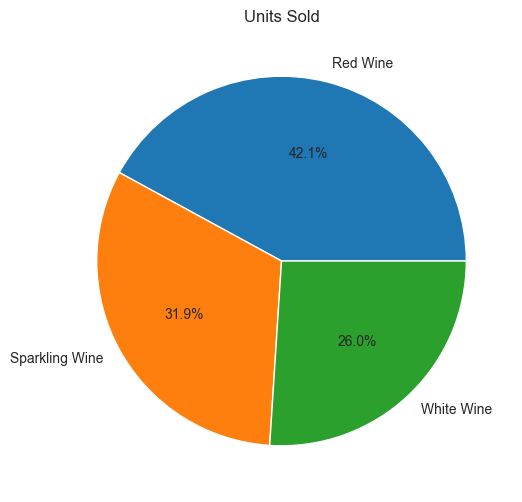

In [ ]:

categories = list(pie_data.keys())

data_pie = list(pie_data.values)


sns.set_style("whitegrid") 
plt.figure(figsize=(6, 6)) 
plt.pie(data_pie, labels=categories, autopct='%1.1f%%')
plt.title('Units Sold')
plt.show() 



In [ ]:
#Order the wine Ascending in Price
full_wine = full_wine.sort_values(by='Actual_Price', ascending=True)

In [ ]:
#remove columns I dont need
full_wine= full_wine.drop(columns=['bottle material',
       'categoryLevel1', 'categoryLevel2','categoryLevel3','country',
       'customCategoryTitle', 'ethicalLabel', 
       'isClimateSmartPackaging', 'isCompletelyOutOfStock', 'isDiscontinued',
       'isEthical', 'isKosher', 'isManufacturingCountry', 'isOrganic',
       'isSustainableChoice', 'isTemporaryOutOfStock', 'producerName' , 
       'productNameBold', 'productNameThin', 'restrictedParcelQuantity', 'sugarContent',
      'tasteClockBitter',
       'tasteClockGroupBitter', 'tasteClockGroupSmokiness',
        'tasteClockSmokiness',
       'Ecological', 'Ethical', 'Sales_in_Liters', 'taste', 'Bottle_type','Receipt_name','Product_Group','Volume_in_ml', 'volume'], axis=1)


In [ ]:
full_wine.to_csv('full_wine.csv', encoding='utf-8',index=False, sep=",")

Text(0, 0.5, 'Count of Wines at each price')

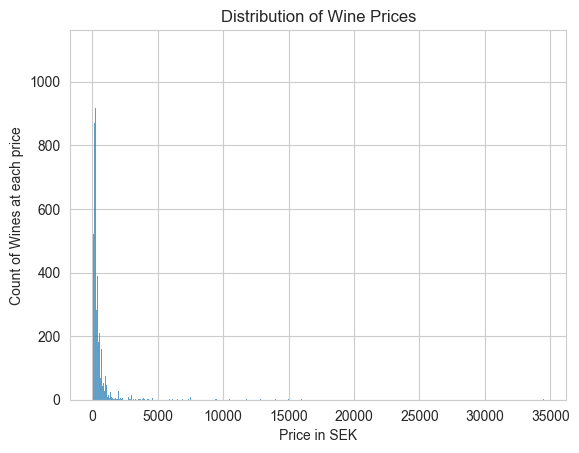

In [196]:
#make histogram of counts of products (it can't handle the units sold figures)

sns.histplot(data=full_wine,x='Actual_Price')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price in SEK')  
plt.ylabel('Count of Wines at each price')  

In [ ]:
cheaper_wine= full_wine[full_wine['Actual_Price']< 1000]

Text(0, 0.5, 'Count of Wines at each price')

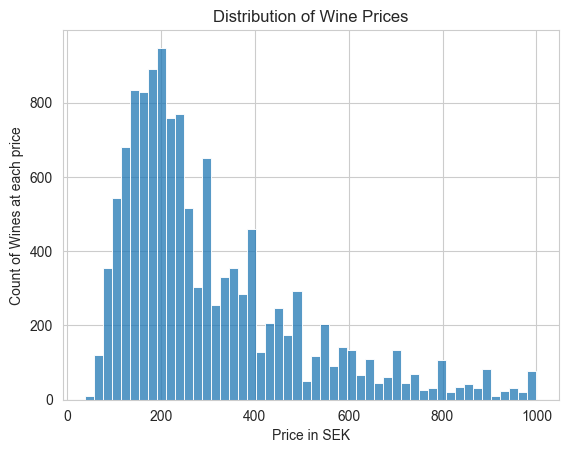

In [195]:
#make plot for the cheaper wines
sns.histplot(data=cheaper_wine,x='Actual_Price')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price in SEK')  
plt.ylabel('Count of Wines at each price')  

In [ ]:
#assign buckets



bucket_wine = full_wine.copy()



def bucket(x):
    if x > 500:
        return 'Over 500'
    elif x > 249:
        return '250 to 499'
    elif x > 199:
        return '200 to 249'
    elif x > 149:    
        return '150 to 199'
    elif x > 99:
        return '100 to 149'
    elif x > 74:
        return '75-99'
    else:
         return 'less than 75'

bucket_wine['price_bucket']= bucket_wine['Actual_Price'].apply(bucket)

Text(0.5, 1.0, 'Average Units Sold by Price Bucket')

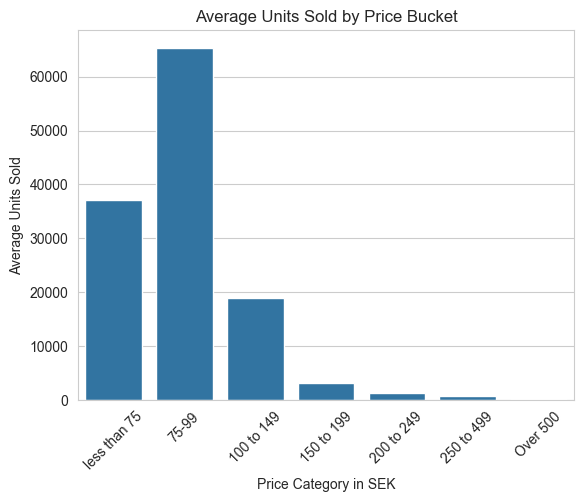

In [197]:
sns.barplot(data=bucket_wine , x='price_bucket', y='Units_sold', errorbar= None)
plt.xlabel('Price Category in SEK')  
plt.xticks(rotation=45)
plt.ylabel('Average Units Sold')  


plt.title('Average Units Sold by Price Bucket')

In [ ]:


columns_of_interest = ['Product_Group_Details','Name', 'vintage', 'Actual_Price', 'Country', 'Region', 'origin','Units_sold', 'productNumberShort_Varunr']
sorted_wine[columns_of_interest].tail(30)


,Product_Group_Details,Name,vintage,Actual_Price,Country,Region,origin,Units_sold,productNumberShort_Varunr
12767,Sparkling Wine,Marastoni Prosecco Organic Extra Dry,NaN,59.0,Italian,Venetien,Prosecco,8.0,50642
14588,Red Wine,Viña Laroche Pinot Noir,NaN,59.0,Chile,Aconcagua,Casablanca,7882.0,52919
11714,White Wine,Malat Ried Höhlgraben Grüner Veltliner,NaN,59.0,"Austria, Austria",Lower Austria,Kremstal,2284.0,2427
15233,White Wine,CHILL OUT Riesling Pfalz Organic,NaN,59.0,Germany,Palatinate,Palatinate,1437.0,53600
1664,White Wine,Victoria Riesling,NaN,59.0,Germany,Palatinate,Palatinate,5267.0,5340
13583,Red Wine,Perdeberg Cellar The Dry Land Collection Pione...,NaN,59.0,South Africa,Western Cape,Coastal Region,7447.0,2875
17965,Red Wine,Snabba Cash Barbera d'Asti by Jens Lapidus,NaN,59.0,Italian,Piedmont,Barbera d'Asti,4789.0,56159
12289,White Wine,Amicone Bianco Organic,NaN,59.0,Italian,Three Venices,Three Venices,1902.0,50117
18661,Red Wine,unsweet Organic Smooth Italian Red,NaN,59.0,Italian,Italian,Italian,3154.0,56605
7310,Red Wine,Jacques Germanier Cabernet Sauvignon Merlot,NaN,59.0,South Africa,Western Cape,Western Cape,10937.0,20027


# Pull in the wine data from the parsed vivino files

In [ ]:
vivino_data= pd.read_csv('vivino_data.csv')